In [1]:
import matplotlib

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import jgraph
from operator import itemgetter, attrgetter
import matplotlib.pyplot as plt
import itertools
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot

import chart_studio.plotly as py
from plotly.graph_objs import *

init_notebook_mode(True)

In [3]:
def draw_graph(graph):

    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    for node in nodes:
        G.add_node(node)

    for edge in graph:
        G.add_edge(edge[0], edge[1])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    plt.show()

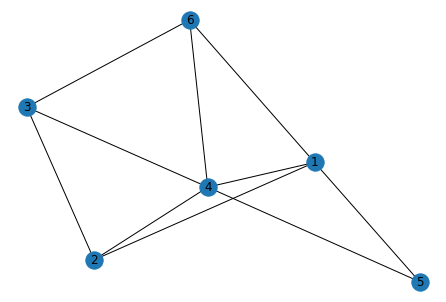

<Figure size 1440x1440 with 0 Axes>

In [4]:
graph = [(4, 1),(1, 2),(2, 3), (3, 4),(4, 5), (5, 4), (4,2), (4, 2),(1, 6),(6, 3), (6, 4),(5, 5), (5, 1), (4,1)]
draw_graph(graph)
plt.figure(figsize=(20, 20))
# show Graph
plt.show()

In [69]:
char1 = ['Frodo', 'Sam', 'Marry', 'Pippin', 'Sauron', 'Gandalf', 'Legolas', 'Sauron', 'Sam', 'Gimli', 'Gollum', 'Gimli', 'Legolas', 'Saruman', 'Galadriel', 'Pippin', 'Bilbo', 'Frodo','Bilbo','Elrond','Galadriel','Aragorn','Marry','Gandalf','Pippin','Gandalf','Gandalf','Gandalf','Gandalf','Frodo','Frodo']
char2 = ['Sam', 'Gollum', 'Boromir', 'Gandalf', 'Galadriel', 'Bilbo','Gimli', 'Pippin', 'Aragorn', 'Aragorn', 'Frodo', 'Galadriel', 'Frodo', 'Gandalf', 'Aragorn', 'Sauron', 'Gandalf', 'Nazgul','Frodo','Gandalf','Saruman','Boromir','Pippin','Saruman','Boromir','Aragorn','Gimli','Legolas','Boromir','Marry','Pippin']

# 1 represents a good character, 0 represents an evil character
goodness = [1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1]

# 1 represents frienship, -1 represents enmity
g_or_v = [1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,1]

good_villains = pd.concat([pd.DataFrame(char1), pd.DataFrame(char2), pd.DataFrame(g_or_v)], axis=1)
good_villains.columns = ['Character1', 'Character2', 'goodORvillains']

nodelist = pd.concat([pd.DataFrame(char1), pd.DataFrame(goodness)], axis=1)
nodelist.columns = ['Character', 'Goodness']
nodelist.drop_duplicates(inplace = True)

In [84]:
nodelist.to_csv('datasets/nodeslist.csv', index = None)
good_villains.to_csv('datasets/good_villains.csv', index = None)

In [87]:
nodelist = pd.read_csv('datasets/nodeslist.csv')
print(nodelist.head())
good_villains = pd.read_csv('datasets/good_villains.csv')
print(good_villains.head())

  Character  Goodness
0     Frodo       1.0
1       Sam       1.0
2     Marry       1.0
3    Pippin       1.0
4    Sauron       0.0
  Character1 Character2  goodORvillains
0      Frodo        Sam             1.0
1        Sam     Gollum             1.0
2      Marry    Boromir             1.0
3     Pippin    Gandalf            -1.0
4     Sauron  Galadriel            -1.0


In [88]:
hp_graph = []
for i,j in zip(good_villains.Character1, good_villains.Character2):
    hp_graph.append((i,j))
hp_graph

[('Frodo', 'Sam'),
 ('Sam', 'Gollum'),
 ('Marry', 'Boromir'),
 ('Pippin', 'Gandalf'),
 ('Sauron', 'Galadriel'),
 ('Gandalf', 'Bilbo'),
 ('Legolas', 'Gimli'),
 ('Sauron', 'Pippin'),
 ('Sam', 'Aragorn'),
 ('Gimli', 'Aragorn'),
 ('Gollum', 'Frodo'),
 ('Gimli', 'Galadriel'),
 ('Legolas', 'Frodo'),
 ('Saruman', 'Gandalf'),
 ('Galadriel', 'Aragorn'),
 ('Pippin', 'Sauron'),
 ('Bilbo', 'Gandalf'),
 ('Frodo', 'Nazgul'),
 ('Bilbo', 'Frodo'),
 ('Elrond', 'Gandalf'),
 ('Galadriel', 'Saruman'),
 ('Aragorn', 'Boromir'),
 ('Marry', 'Pippin'),
 ('Gandalf', 'Saruman'),
 ('Pippin', 'Boromir'),
 ('Gandalf', 'Aragorn'),
 ('Gandalf', 'Gimli'),
 ('Gandalf', 'Legolas'),
 ('Gandalf', 'Boromir'),
 ('Frodo', 'Marry'),
 ('Frodo', 'Pippin')]

In [89]:
jgraph.draw(hp_graph, directed=False, shader='lambert', default_node_color=g_or_v)

In [90]:
good_villains[0:5]

,Character1,Character2,goodORvillains
0,Frodo,Sam,1.0
1,Sam,Gollum,1.0
2,Marry,Boromir,1.0
3,Pippin,Gandalf,-1.0
4,Sauron,Galadriel,-1.0


In [91]:
nodelist1 = []
for i,j in zip(good_villains.Character1, goodness):
    nodelist1.append((i,j))
nodelist1

[('Frodo', 1),
 ('Sam', 1),
 ('Marry', 1),
 ('Pippin', 1),
 ('Sauron', 0),
 ('Gandalf', 1),
 ('Legolas', 1),
 ('Sauron', 0),
 ('Sam', 1),
 ('Gimli', 1),
 ('Gollum', 0),
 ('Gimli', 1),
 ('Legolas', 1),
 ('Saruman', 0),
 ('Galadriel', 1),
 ('Pippin', 1),
 ('Bilbo', 1),
 ('Frodo', 1),
 ('Bilbo', 1),
 ('Elrond', 1),
 ('Galadriel', 1),
 ('Aragorn', 1)]

In [92]:
g = nx.Graph()
g.add_edges_from(hp_graph)

In [93]:
dict(nodelist1)

{'Frodo': 1,
 'Sam': 1,
 'Marry': 1,
 'Pippin': 1,
 'Sauron': 0,
 'Gandalf': 1,
 'Legolas': 1,
 'Gimli': 1,
 'Gollum': 0,
 'Saruman': 0,
 'Galadriel': 1,
 'Bilbo': 1,
 'Elrond': 1,
 'Aragorn': 1}

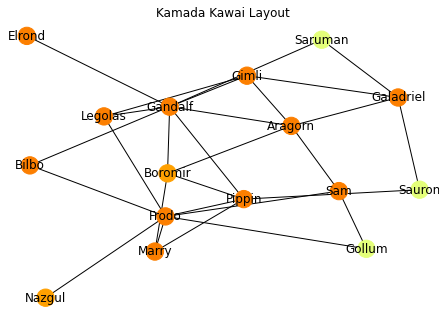

In [94]:
#  Kamada Kawai Layout
values = [dict(nodelist1).get(node, 0.75) for node in g.nodes()]
# values2 = [(g_or_v).get(node, 0.25) for node in g.nodes()]

nx.draw(g, cmap=plt.get_cmap('Wistia'), node_color=values, with_labels = True)
plt.title('Kamada Kawai Layout')
plt.show()

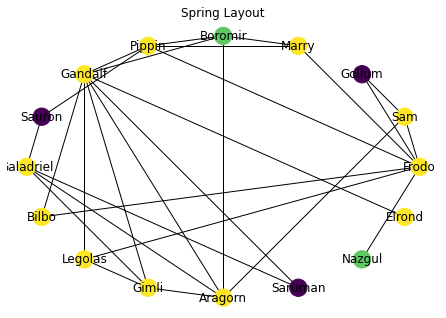

<Figure size 1440x1440 with 0 Axes>

In [95]:
# Spring Layout
pos = nx.spring_layout(g)
nx.draw_circular(g, with_labels = True, node_color = values)
plt.title('Spring Layout')
plt.figure(figsize=(20, 20))
# show Graph
plt.show()

In [96]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.23333333333333334


In [97]:
hagrid_to_bellatrix = nx.shortest_path(g, source="Aragorn", target="Frodo")

print("Shortest path between Gandalf and Sauron:", hagrid_to_bellatrix)
print("Length of that path:", len(hagrid_to_bellatrix) - 1)

Shortest path between Gandalf and Sauron: ['Aragorn', 'Sam', 'Frodo']
Length of that path: 2
